In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

# Линейная Регрессия

In [2]:
# Сгенерируем набор случайных X и у для синтетических данных
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])
df.head()

,x,y
0,0.488252,5.655499
1,0.809940,6.991325
2,0.626694,6.184423
3,1.691981,9.329740
4,1.102340,8.287908


Text(0, 0.5, 'y')

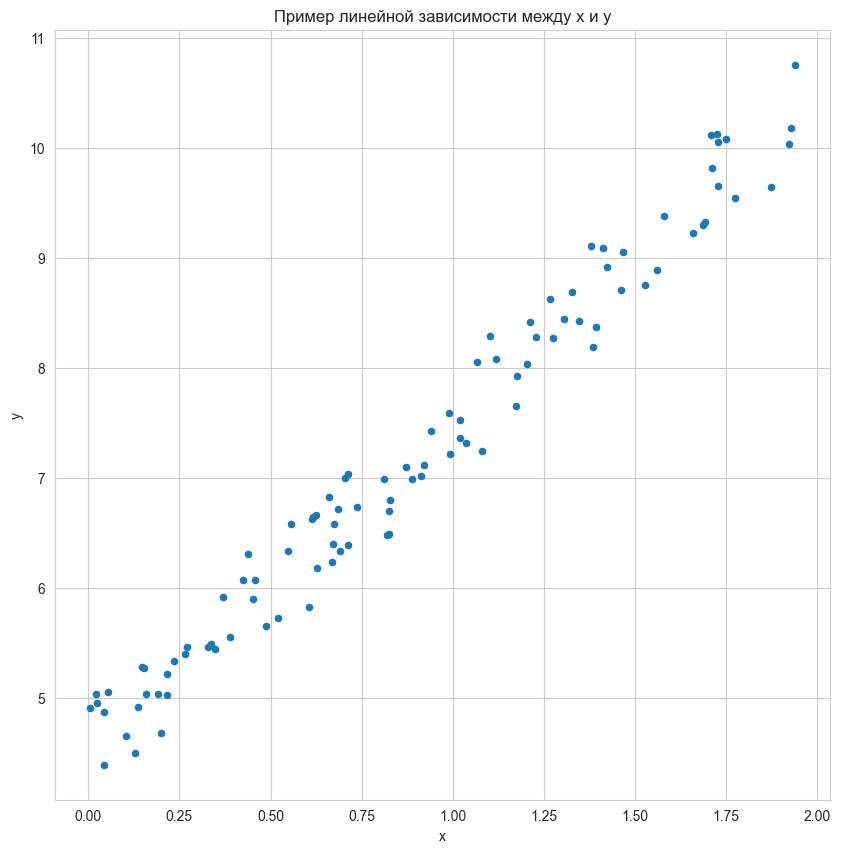

In [3]:
# Визуализируем зависимость между Х и у чтобы убедиться что присутствует линейная зависимость
df.plot.scatter('x', 'y')
plt.title("Пример линейной зависимости между х и у")
plt.xlabel("x")
plt.ylabel("y")

# Парная линейная регрессия

![img](./pics/linreg_description.png)

Построим самостоятельно любую случайную прямую и посмотрим насколько хорошо она описывает наши данные?

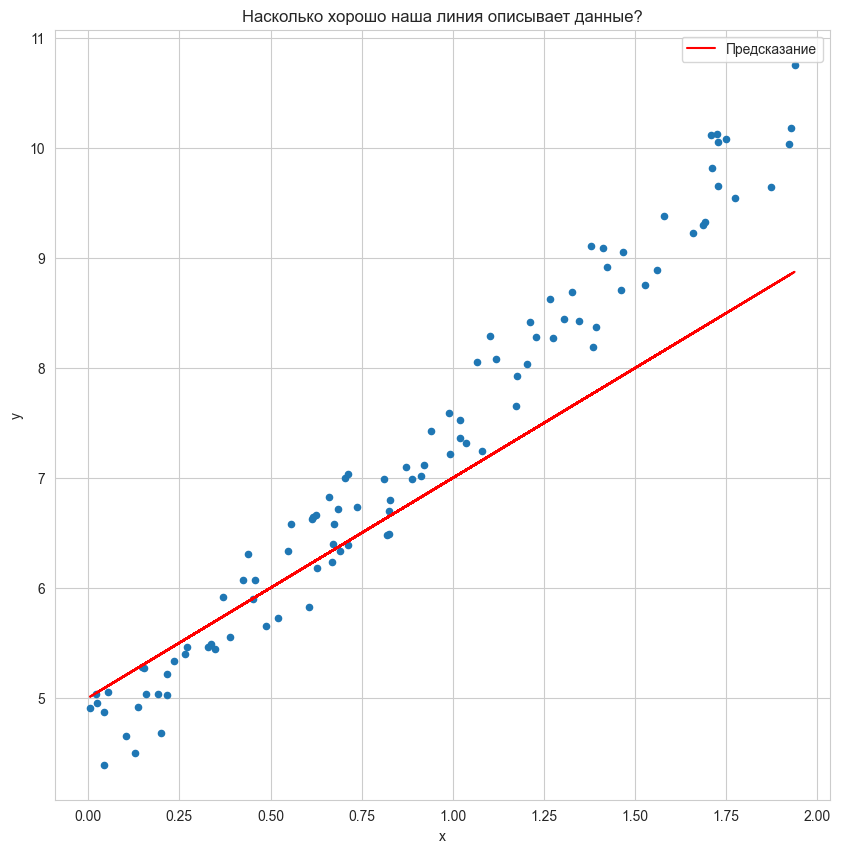

In [4]:
def predict(x):
    return 2 * x + 5

df.plot.scatter('x', 'y')
plt.title('Насколько хорошо наша линия описывает данные?')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, predict(x), color='red', label='Предсказание')
plt.legend();

![img](./pics/rss_desc.png)

Сделаем предсказание, посмотрим на отклонения:

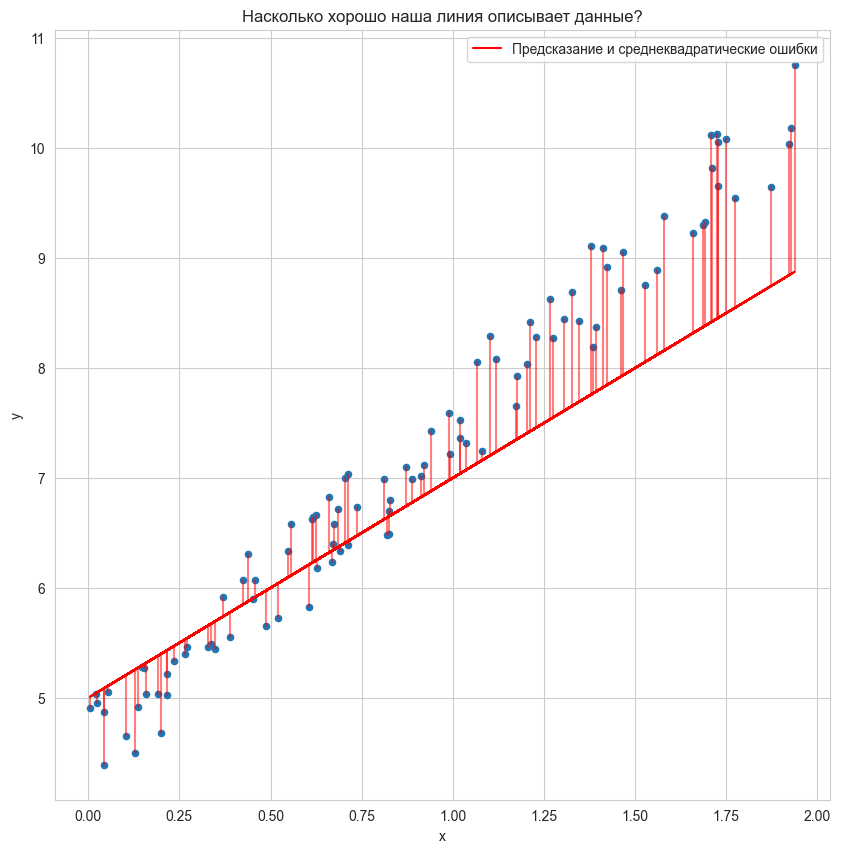

In [5]:
y_pred = predict(x)

df.plot.scatter('x', 'y')
plt.title('Насколько хорошо наша линия описывает данные?')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pred, color='red', label='Предсказание и среднеквадратические ошибки')
plt.legend();

for x_i, y_i, y_i_pred in zip(x, y, y_pred):
    plt.plot([x_i, x_i], [y_i_pred, y_i], color='red', alpha=0.5)

In [6]:
# Посчитаем RSS
rss = ((y - y_pred) ** 2).sum()
print(f"RSS: {round(rss, 4)}")

print(f"MSE: {round(mean_squared_error(y, y_pred) * y.size, 4)}")

RSS: 51.1983
MSE: 51.1983


In [8]:
mean_squared_error(y, y_pred)* y.size

51.198283888290796

![img](./pics/b0_grad.png)

![img](./pics/b0_desc.png)


![img](./pics/b1_grad.png)

![img](./pics/b1_grad_2.png)

![img](./pics/b1_grad_3.png)

In [9]:
def estimator(x, y):
    x_avg = x.mean()
    y_avg = y.mean()

    b1_hat = ((x - x_avg) * (y - y_avg)).sum() / ((x - x_avg) ** 2).sum()
    b0_hat = y_avg - b1_hat * x_avg

    return  b0_hat, b1_hat

def predict_estimated(x, b0, b1):
    return b0 + x * b1

In [10]:
b0, b1 = estimator(x, y)

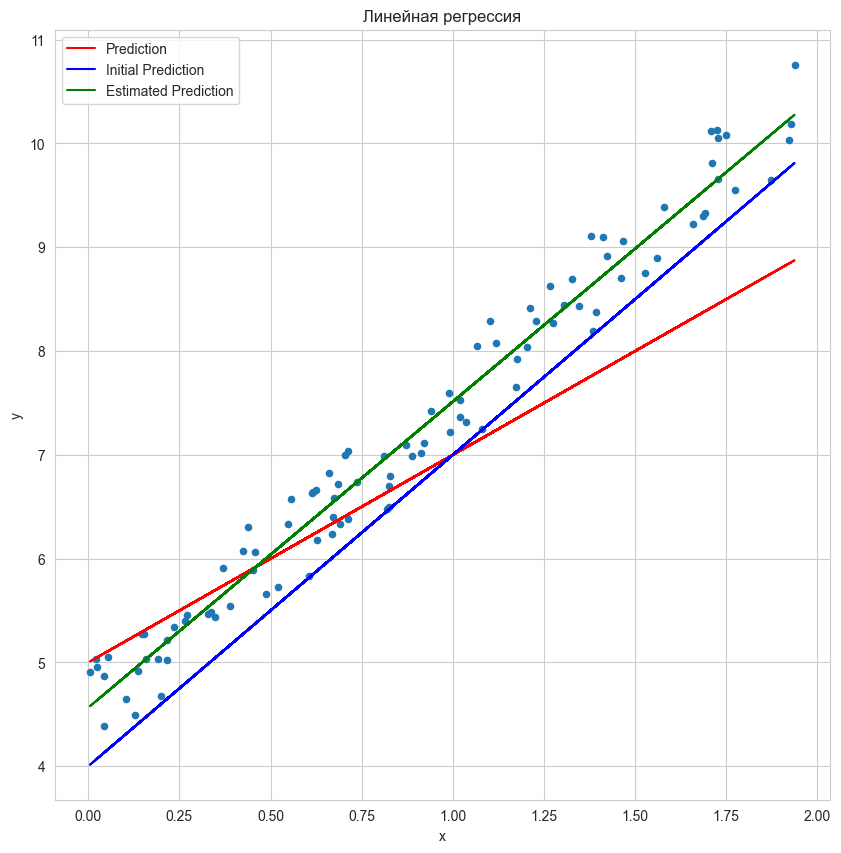

In [11]:
df.plot.scatter('x', 'y')
plt.title('Линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, predict(x), color='red', label='Prediction')
plt.plot(x, predict_estimated(x, 4, 3), color='blue', label='Initial Prediction')
plt.plot(x, predict_estimated(x, b0, b1), color='green', label='Estimated Prediction')
plt.legend();

In [12]:
print("Estimated coefficients for linear regression: b0 = {} and b1 = {}".format(round(b0,4), round(b1,4)))
print("Initial coefficients for linear regression :  b0 = 4  and b1 = 3")

Estimated coefficients for linear regression: b0 = 4.5645 and b1 = 2.9482
Initial coefficients for linear regression :  b0 = 4  and b1 = 3


# Многофакторная (Множественная) линейная регрессия

![img](./pics/multivariate_reg.png)

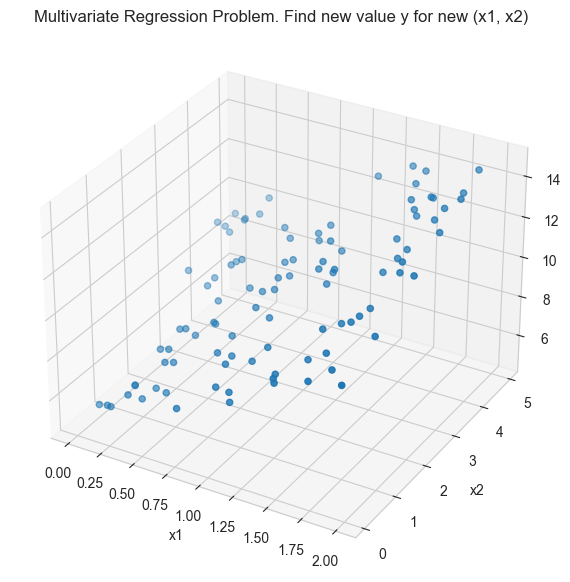

In [13]:
plt.rcParams['figure.figsize'] = [7, 8]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1 = 2 * np.random.rand(100, 1)
x2 = 5 * np.random.rand(100 ,1)

# y = 4 + 3*x_1 + 1*x_2
y = 4 + 3 *x1 + x2 + np.random.rand(100, 1)

ax.scatter(x1, x2, y, marker='o')
ax.set_title("Multivariate Regression Problem. Find new value y for new (x1, x2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show();

![img](./pics/martix_form_lr.png)


# Производная по матрице
[Link 1](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf)
[Link 2](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf)
[Link 3](https://towardsdatascience.com/matrix-calculus-for-data-scientists-6f0990b9c222)
[Link 4](https://www.youtube.com/watch?v=e73033jZTCI&ab_channel=ritvikmath)
[Link 5](https://mathinsight.org/derivative_matrix)

![img](./pics/martix_der.png)

In [14]:
x = np.hstack([np.ones(x1.shape[0]).reshape(-1, 1), x1, x2])
weights = la.inv(x.T.dot(x)).dot(x.T).dot(y)
print(weights)

[[4.47583354]
 [2.98982548]
 [1.00293122]]


In [15]:
def predict_estimated(x, w):
    return x.dot(w)

def hyperplane(x1, x2):
    return 4 + x1 * 3 + x2

# Класс линейной регрессии в scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(np.hstack([x1, x2]), y)

print("Intercept: {:.4f} \nSlopes: {}\n".format(lin_reg.intercept_[0], lin_reg.coef_[0]))
y_pred = lin_reg.predict(np.hstack([x1, x2]))
print("Predictions\n", np.hstack([y_pred, y])[:10])
print("\nMSE: {:.4f}".format(mean_squared_error(y_pred, y)))

Intercept: 4.4758 
Slopes: [2.98982548 1.00293122]

Predictions
 [[11.04676613 11.0477307 ]
 [13.52762643 13.48502365]
 [ 6.7813428   7.0719985 ]
 [ 8.15264704  8.03251893]
 [10.85565785 10.63827104]
 [ 9.36721572  9.45473276]
 [ 9.40028372  9.42992587]
 [10.29601842 10.25702476]
 [ 9.96975611  9.52781899]
 [ 9.81837671  9.97419182]]

MSE: 0.0785


# Вычислительная сложность

![img](./pics/algo_O.png)

# Полиномиальная регрессия

In [17]:
m = 100
X = 6 * np.random.rand(m , 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

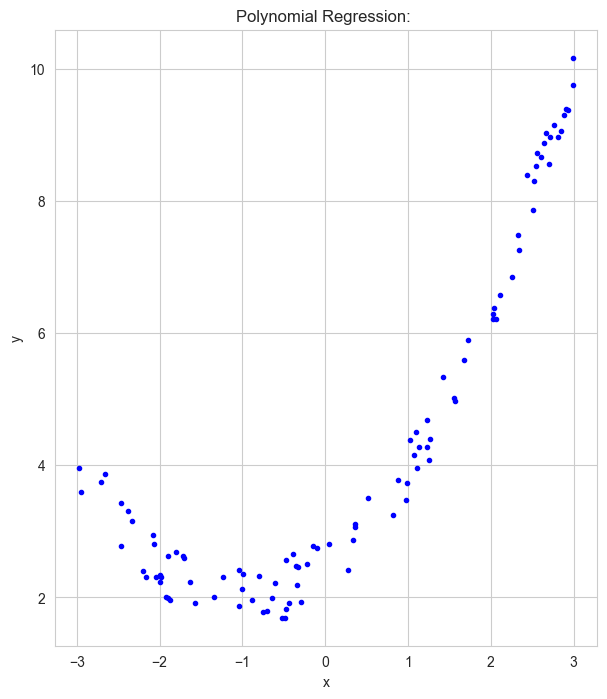

In [18]:
plt.plot(X, y, "b.")
plt.title("Polynomial Regression: ")
plt.xlabel("x")
plt.ylabel("y");

![img](./pics/taylor_ser.png)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [20]:
X[0]

array([1.2683147])

In [21]:
X_poly[0]

array([1.2683147 , 1.60862218])

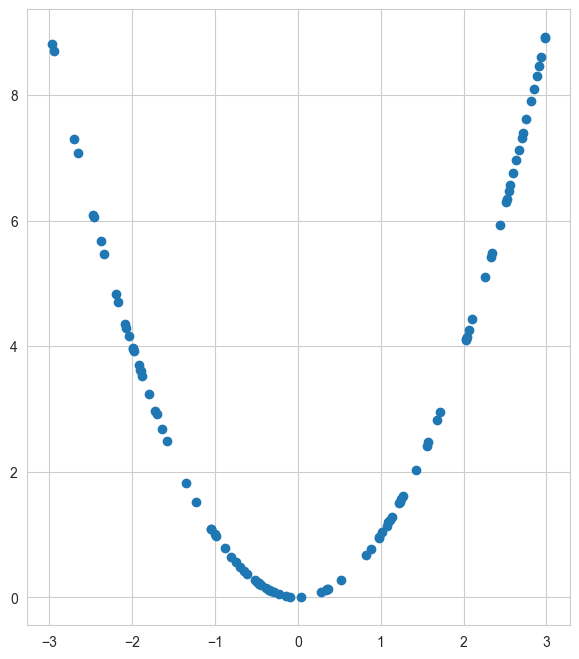

In [22]:
plt.scatter(X_poly[:,0], X_poly[:, 1])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.50109763]), array([[0.97862337, 0.49684474]]))

Text(0, 0.5, 'y')

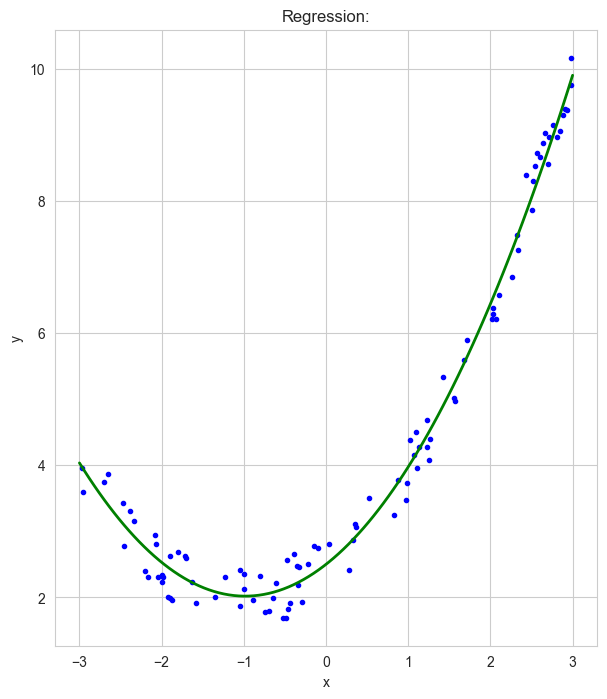

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g-", linewidth=2., label="Polynomial Predictions")
plt.title("Regression:")
plt.xlabel("x")
plt.ylabel("y")

# Проблема переобучения (Overfitting)

К сожалению не всегда так все хорошо, часто когда мы добавляем полиномиальные признаки, это приводит к тому, что мы искусственно раздуваем пространство наших признаков и модель может просто переобучиться. Как это работает:

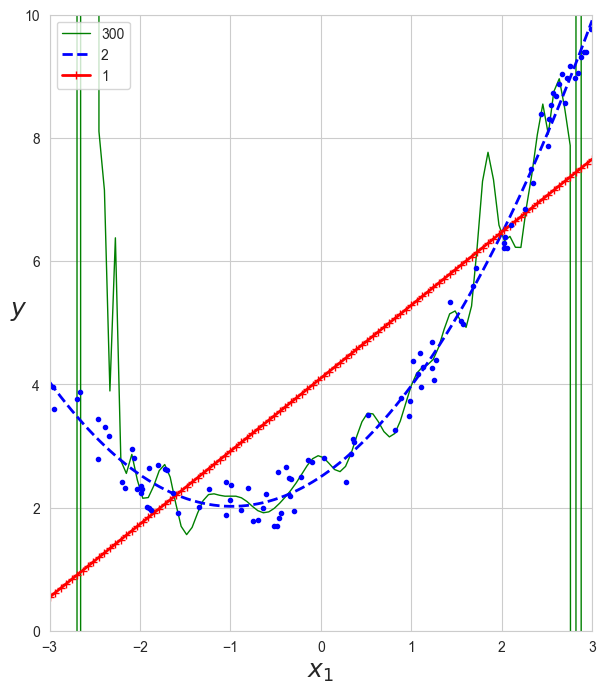

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    # Pipeline объединяем несколько этапов работы в один
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show();

# Что делать в таком случае? Когда признаков много, а качество модели хромает?

![img](./pics/Reguralization.png)

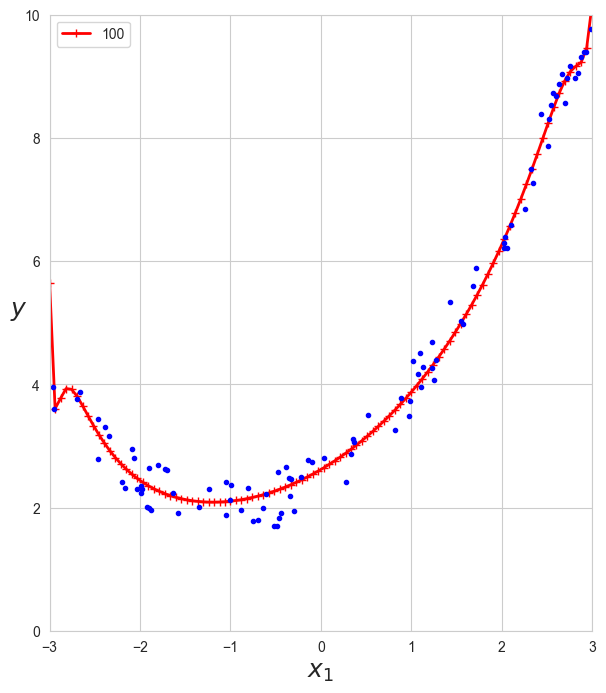

In [26]:
from sklearn.linear_model import Ridge

polybig_features = PolynomialFeatures(degree=100, include_bias=False)
std_scaler = StandardScaler()
ridge_reg = Ridge(alpha=1)

polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("ridge_reg", ridge_reg)
    ])

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show();

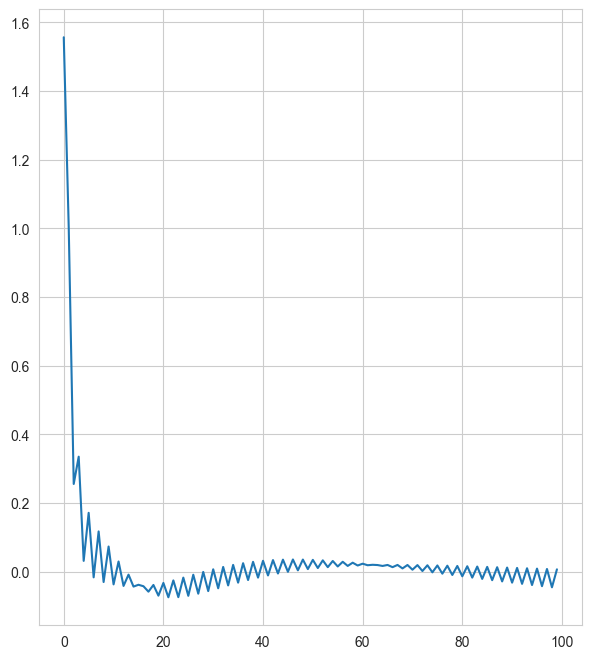

In [27]:
plt.plot(ridge_reg.coef_[0])

![img](./pics/lasso_reg.png)

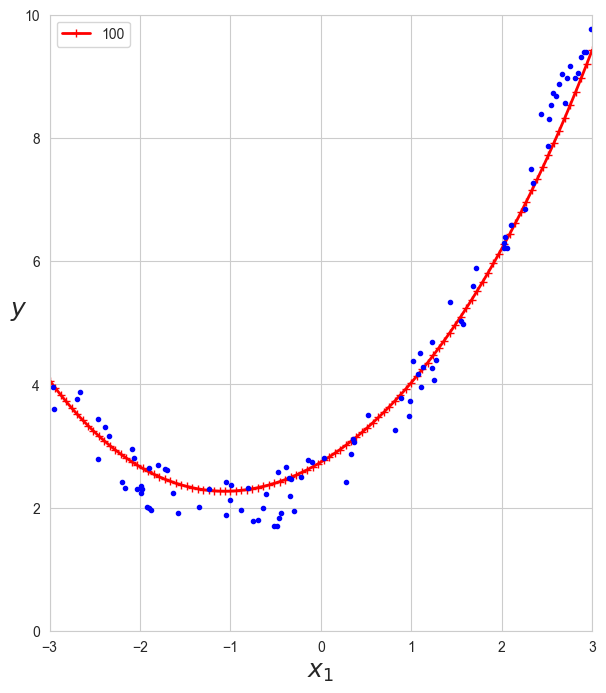

In [28]:
from sklearn.linear_model import Lasso
polybig_features = PolynomialFeatures(degree=100, include_bias=False)
std_scaler = StandardScaler()
lasso_reg = Lasso(alpha=0.2)

polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("ridge_reg", lasso_reg)
    ])

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show();

In [29]:
print(lasso_reg.coef_)

[1.58657353 1.14202748 0.01852617 0.1016204  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


![img](./pics/elastic_net.png)

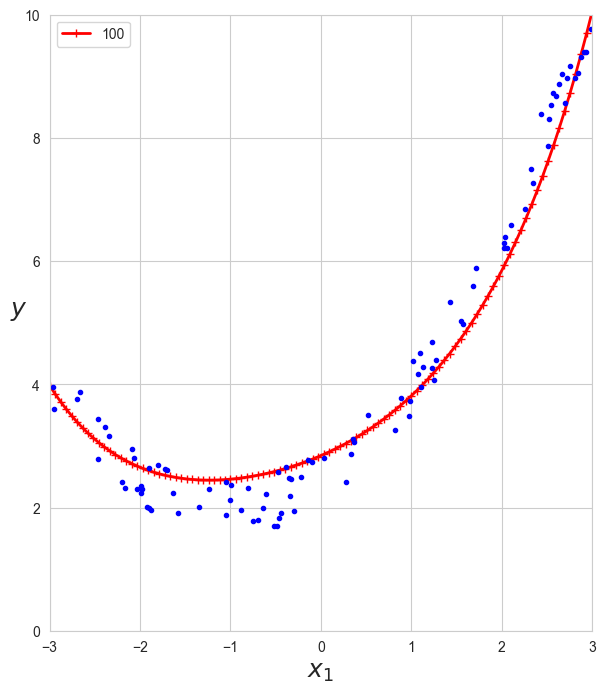

In [30]:
from sklearn.linear_model import ElasticNet
polybig_features = PolynomialFeatures(degree=100, include_bias=False)
std_scaler = StandardScaler()
elastig_reg = ElasticNet(alpha=0.2)

polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("ridge_reg", elastig_reg)
    ])

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show();

In [31]:
elastig_reg.coef_

array([ 1.1493473 ,  0.77773094,  0.43381035,  0.40041781,  0.02053875,
        0.07850599,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

# Ресурсы для обязательного прочтения

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea
* https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer
* https://www.mygreatlearning.com/blog/understanding-of-lasso-regression